In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Class imbalance

- What is it?
- Why might we care about it?
- How can we deal with it?


## What is it?

## Why is it a Problem

- Because the classifier has an "incentive" to rather predict class 0. It just shows up so much more.

## How can we deal with it?

In [3]:
df = pd.read_csv('creditcard.csv', index_col=0)

In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.Class.describe() # how to check for imbalance (mean should be 0.5)

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [13]:
df.Class.value_counts()[1] / len(df.Class) # alternative

0.001727485630620034

In [14]:
# the y data in this dataset is the 'Class' column

In [15]:
def print_evaluations(ytrue, ypred, model):
    print(f'How does model {model} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(ytrue, ypred), 3)}')
    print(f'The recall of the model is: {round(recall_score(ytrue, ypred), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred), 3)}')
    
    #print confusion matrix
    fig = plt.figure(figsize=(6, 6))
    cm = confusion_matrix(ytrue, ypred)
    print(cm)
    
    #plot the heatmap
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non-fraud', 'fraud']); 
    ax.yaxis.set_ticklabels(['non-fraud', 'fraud'])

#### Split the data

In [30]:
y = df.Class
X = df.drop('Class', axis=1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

#### Build a simple baseline model


In [20]:
ypred_baseline = [0] * len(df)

How does model Baseline score:
The accuracy of the model is: 0.998


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The precision of the model is: 0.0
The recall of the model is: 0.0
The f1-score of the model is: 0.0
[[284315      0]
 [   492      0]]


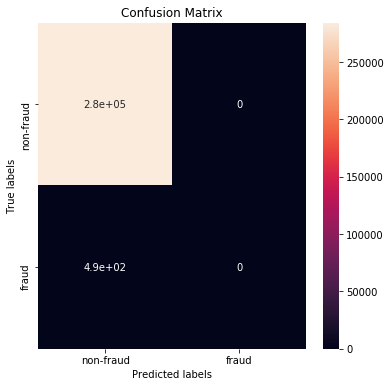

In [21]:
print_evaluations(y, ypred_baseline, 'Baseline')

ypred_baseline has 0 as the only value (but has many of it).

#### Compare it to a random forest classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5, max_depth=3)

In [25]:
rf.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=3, n_estimators=5)

In [26]:
rf_ypred = rf.predict(Xtest)

How does model Random Forest score:
The accuracy of the model is: 0.999
The precision of the model is: 0.866
The recall of the model is: 0.628
The f1-score of the model is: 0.728
[[71078    11]
 [   42    71]]


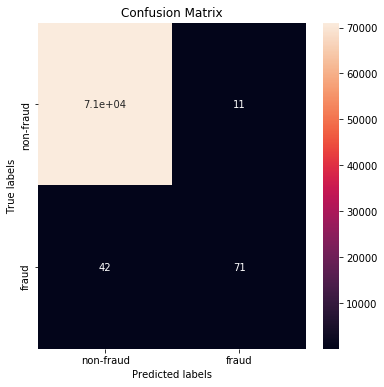

In [27]:
print_evaluations(ytest, rf_ypred, 'Random Forest')

---

### Methods to improve: Use Undersampling

First checking the number of minority class members in training data:
   

In [31]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [40]:
ytrain.describe()

count    213605.000000
mean          0.001774
std           0.042085
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [35]:
ytrain.sum()

379

In [38]:
rus = RandomUnderSampler(sampling_strategy={0: 2000}, random_state=42)
nms = NearMiss(sampling_strategy={0:2000})

In [39]:
Xtrain_rus, ytrain_rus = rus.fit_resample(Xtrain, ytrain)
Xtrain_nms, ytrain_nms = nms.fit_resample(Xtrain, ytrain)

In [43]:
ytrain_rus.describe()

count    2379.000000
mean        0.159311
std         0.366042
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Class, dtype: float64

   * If RandomUnderSampler strategy is given a string it will show which class to undersample, ie. "majority" is only changing the majority class to make sizes equal; all resample all classes.

   * If strategy is given than it shows the ratio of the desired samples.
   
   * Careful that we gave a dictionary.

We are doing the resampling only for training so that we can build a good model, after that we can just fit the test.

How does model Random Forest with RandomUnderSampler score:
The accuracy of the model is: 0.998
The precision of the model is: 0.458
The recall of the model is: 0.867
The f1-score of the model is: 0.599
[[70973   116]
 [   15    98]]


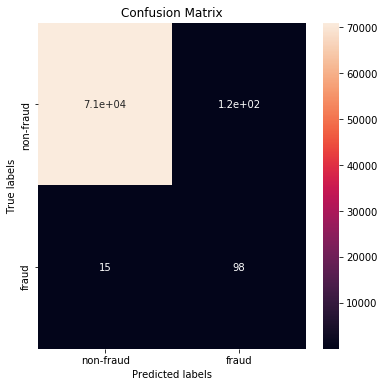

In [46]:
rf.fit(Xtrain_rus, ytrain_rus)
rus_ypred = rf.predict(Xtest)
print_evaluations(ytest, rus_ypred, 'Random Forest with RandomUnderSampler')

How does model Random Forest with NearMiss score:
The accuracy of the model is: 0.396
The precision of the model is: 0.003
The recall of the model is: 0.982
The f1-score of the model is: 0.005
[[28091 42998]
 [    2   111]]


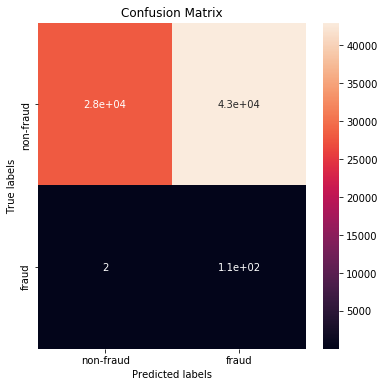

In [48]:
rf.fit(Xtrain_nms, ytrain_nms)
nms_ypred = rf.predict(Xtest)
print_evaluations(ytest, nms_ypred, 'Random Forest with NearMiss')

### Use Oversampling

In [49]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [52]:
ros = RandomOverSampler(sampling_strategy={1: 2000}, random_state=42)
sms = SMOTE(sampling_strategy={1: 2000}, random_state=42)

In [53]:
Xtrain_ros, ytrain_ros = ros.fit_resample(Xtrain, ytrain)
Xtrain_sms, ytrain_sms = sms.fit_resample(Xtrain, ytrain)

#### Synthetic Minority Over Sampling

Random factor times the distance to the Nearest Neighbour is used to generate new data point.

How does model Random Oversampler score:
The accuracy of the model is: 0.999
The precision of the model is: 0.837
The recall of the model is: 0.637
The f1-score of the model is: 0.724
[[71075    14]
 [   41    72]]


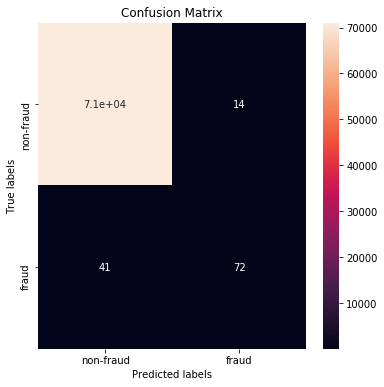

In [70]:
rf.fit(Xtrain_ros, ytrain_ros)
ros_ypred = rf.predict(Xtest)
print_evaluations(ytest, ros_ypred, 'Random Oversampler')

How does model SMOTE oversampler score:
The accuracy of the model is: 0.999
The precision of the model is: 0.837
The recall of the model is: 0.77
The f1-score of the model is: 0.802
[[71072    17]
 [   26    87]]


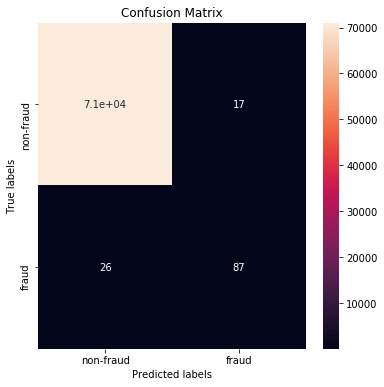

In [87]:
rf.fit(Xtrain_sms, ytrain_sms)
sms_ypred = rf.predict(Xtest)
print_evaluations(ytest, sms_ypred, 'SMOTE oversampler')

In [89]:
#SMOTEtomek further read, combining SMOTE oversampling and some undersampling in one function

In [91]:
import imblearn

In [92]:
imblearn.__version__

'0.7.0'

In [94]:
import sklearn
sklearn.__version__

'0.23.1'

In [95]:
import spacy
spacy.__version__

'2.2.4'